In [1]:
from numpy import sin,cos,pi,sqrt,angle,exp,deg2rad,arange,rad2deg
import matplotlib.pyplot as plt
from qutip import *
%matplotlib inline

In [2]:
H = Qobj([[1],[0]])
V = Qobj([[0],[1]])

In [3]:
def P(theta):
    """The projection operator for a state at angle theta"""
    theta_ket = cos(theta)*H + sin(theta)*V
    return theta_ket*theta_ket.dag()

In [4]:
Pa1 = P(deg2rad(19))
Pa2 = P(deg2rad(-35))
Pb1 = P(deg2rad(-19))
Pb2 = P(deg2rad(35))

In [5]:
psi=sqrt(0.2)*tensor(H,H) + sqrt(0.8)*tensor(V,V)

In [6]:
P1 = expect(tensor(Pa1,Pb1),psi)  # joint for A1, B1 (expect 0.09)
P2 = psi.dag()*tensor(Pa1,Pb1)*psi
P1 == P2.data[0,0]  # The only difference is that we have to pull out the value 
                    # from the Qobj using the .data[0,0] method so we can compare it to result from `expect`

True

In [7]:
P1

0.09302920042790863

In [8]:
# B2 conditioned on A1 (expect 1)
Prob_b2_a1 = expect(tensor(Pa1,Pb2),psi)
#(psi.dag()*tensor(Pa1,Pb2)*psi).data[0,0]   # the joint probability
Prob_a1 = expect(tensor(Pa1,qeye(2)),psi)
#(psi.dag()*tensor(Pa1,qeye(2))*psi).data[0,0]  # the singular probability
Prob_b2a1 = Prob_b2_a1 / Prob_a1  # the conditional probability
Prob_b2a1

0.999939256912056

In [9]:
# A2 conditioned on B1 (expect 1)
# can do it all on one line:
expect(tensor(Pa2,Pb1),psi) / expect(tensor(qeye(2),Pb1),psi)

0.999939256912056

In [10]:
expect(tensor(Pa2,Pb2),psi)  # joint for A2, B2 (classically expect 0.09, QM says 0)

3.39573005293161e-05

In [11]:
psi2=tensor(H,H)

In [12]:
expect(tensor(Pa1,Pb1),psi2)  # joint for A1, B1 (expect 0.09)

0.7992456137533195

In [13]:
# B2 conditioned on A1:
expect(tensor(Pa1,Pb2),psi2) / expect(tensor(Pa1,qeye(2)),psi2)

0.6710100716628343

In [14]:
# A2 conditioned on B1 
expect(tensor(Pa2,Pb1),psi2) / expect(tensor(qeye(2),Pb1),psi2)

0.6710100716628343

In [15]:
# joint for A2, B2
expect(tensor(Pa2,Pb2),psi2)

0.45025451627296204

In [16]:
rho_mix = 0.2 * ket2dm(tensor(H,H)) + 0.8 * ket2dm(tensor(V,V))
rho_mix

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.2 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.8]]

In [17]:
# joint for A1, B1
expect(tensor(Pa1,Pb1),rho_mix)  

0.1688370108679419

In [18]:
# B2 conditioned on A1
expect(tensor(Pa1,Pb2),rho_mix) / expect(tensor(Pa1,qeye(2)),rho_mix)

0.5609865818344059

In [19]:
# A2 conditioned on B1
expect(tensor(Pa2,Pb1),rho_mix) / expect(tensor(Pb1,qeye(2)),rho_mix)

0.5609865818344059

In [20]:
# joint for A2, B2:
expect(tensor(Pa2,Pb2),rho_mix)  

0.1766384016124271

In [21]:
rho_pure = ket2dm(psi)  # convert from a ket to a density matrix (dm)
rho_pure

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.2 0.  0.  0.4]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.4 0.  0.  0.8]]

In [22]:
# joint for A1, B1
expect(tensor(Pa1,Pb1),rho_pure)  

0.0930292004279086

In [23]:
# B2 conditioned on A1
expect(tensor(Pa1,Pb2),rho_pure) / expect(tensor(Pa1,qeye(2)),rho_pure)

0.999939256912056

In [24]:
# A2 conditioned on B1
expect(tensor(Pa2,Pb1),rho_pure) / expect(tensor(Pb1,qeye(2)),rho_pure)

0.999939256912056

In [25]:
# joint for A2, B2:
expect(tensor(Pa2,Pb2),rho_pure)  

3.3957300529310896e-05

In [26]:
psi=sqrt(0.2)*tensor(H,H) + sqrt(0.8)*tensor(V,V)

In [27]:
angles = arange(1,90,1)

In [28]:
rads = deg2rad(angles)

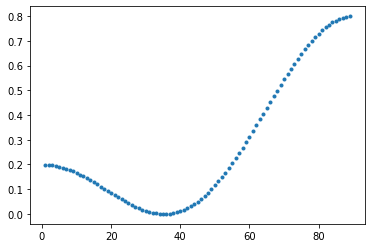

In [29]:
out = []
for r in rads:
    out.append(expect(tensor(P(-r),P(r)),psi))

plt.plot(angles,out,".") # plot in units of pi

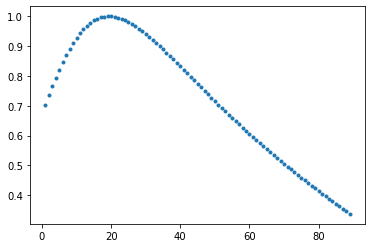

In [30]:
out = []
for r in rads:
    out.append(expect(tensor(P(r),P(deg2rad(35))),psi) / expect(tensor(P(r),qeye(2)),psi))

plt.plot(angles,out,".")

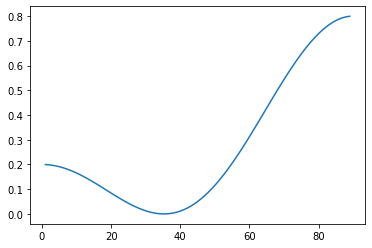

In [31]:
# Solution:
# For the first plot, we can show the joint probability for two angles is given by:

plt.plot(rad2deg(rads),(sqrt(0.2)*cos(-rads)*cos(rads) + sqrt(0.8)*sin(-rads)*sin(rads))**2)

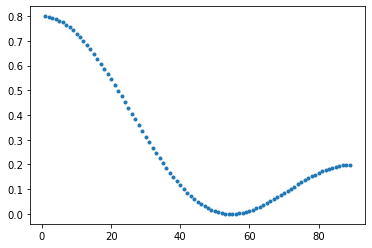

In [32]:
# Solution

psi3=sqrt(0.8)*tensor(H,H) + sqrt(0.2)*tensor(V,V)

out = []
for r in rads:
    out.append(expect(tensor(P(-r),P(r)),psi3))

plt.plot(angles,out,".") # plot in units of pi

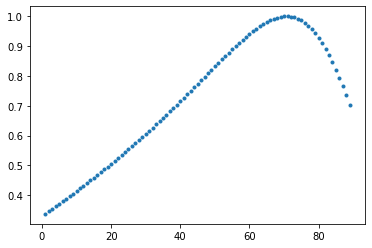

In [33]:
# Solution
out = []
for r in rads:
    out.append(expect(tensor(P(r),P(deg2rad(55))),psi3) / expect(tensor(P(r),qeye(2)),psi3))

plt.plot(angles,out,".")